In [9]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from ann_visualizer.visualize import ann_via
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
csv_logger=CSVLogger("model_history_log.csv", append=True)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
print(len(train_labels))
print(len(test_labels))
train_images= (train_images/255)-0.5
test_images =(test_images/ 255) - 0.5

60000
10000


In [11]:
num_filters = 1
filter_size = 9
pool_size = 2
model = Sequential ([
    Conv2D(num_filters, filter_size, input_shape=(28,28,1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense (10, activation='softmax'),
])
tf.keras.callbacks.EarlyStopping(

    monitor="loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False, )

In [12]:

callback_1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)



In [15]:
model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],

)
history=  model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[csv_logger, callback_1],

)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.2845 - accuracy: 0.9180 - val_loss: 0.2671 - val_accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2732 - accuracy: 0.9217 - val_loss: 0.2536 - val_accuracy: 0.9263
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2633 - accuracy: 0.9241 - val_loss: 0.2481 - val_accuracy: 0.9261
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2560 - accuracy: 0.9261 - val_loss: 0.2355 - val_accuracy: 0.9314
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2502 - accuracy: 0.9281 - val_loss: 0.2316 - val_accuracy: 0.9309


In [16]:
model.save_weights('cnn.h5')
model.load_weights('cnn.h5')
predictions= model.predict(test_images[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10])

1/1 [==============================] - 0s 100ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


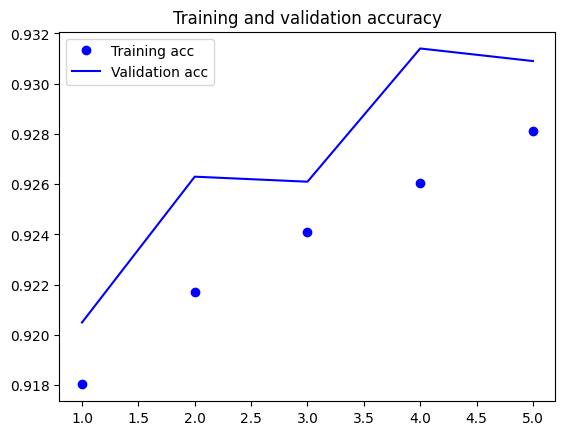

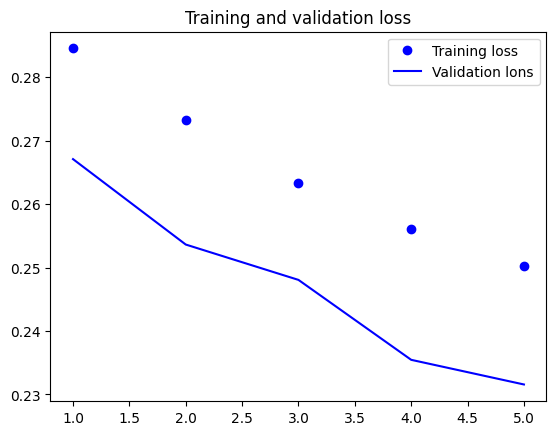

In [17]:
accuracy = history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len (accuracy) +1)
plt.plot(epochs, accuracy, 'bo', label= 'Training acc')
plt.plot(epochs, val_accuracy, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation lons')
plt.title('Training and validation loss')
plt.legend()
plt.show()